In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models, layers
from keras.preprocessing import text, sequence

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0.Projects/Text Similarity/sample_data.csv')

In [0]:
df.head()

,Unnamed: 0,sentences1,sentences2,is_similar
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
df.head()

,sentences1,sentences2,is_similar
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
tokenizer = text.Tokenizer()

In [0]:
sentence_1 = df['sentences1']
sentence_2 = df['sentences2']
y = df['is_similar']

In [0]:
sentence_split = lambda x: x.lower().split()

In [0]:
sentence_1_split = sentence_1.apply(sentence_split)

In [0]:
sentence_1_split = sentence_1_split.to_list()

In [0]:
sentence_2_split = sentence_2.apply(sentence_split)
sentence_2_split = sentence_2_split.to_list()

In [0]:
sentence_1.shape

(499,)

In [0]:
full_sentence = pd.concat([sentence_1, sentence_2], axis=0)

In [0]:
full_sentence_list = full_sentence.apply(sentence_split).to_list()

In [0]:
full_sentence_list

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india?'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', '(koh-i-noor)', 'diamond?'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn?'],
 ['why',
  'am',
  'i',
  'mentally',
  'very',
  'lonely?',
  'how',
  'can',
  'i',
  'solve',
  'it?'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar,',
  'salt,',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide?'],
 ['astrology:',
  'i',
  'am',
  'a',
  'capricorn',
  'sun',
  'cap',
  'moon',
  'and',
  'cap',
  'rising...what',
  'does',
  'that',
  'say',
  'about',
  'me?'],
 ['should', 'i', 'buy', 'tiago?'],
 ['how', 'can', 'i', 'be', 'a', 'good', 'geologist?'],
 ['when', 'do', 'you', 'use', 'シ', 'instead', 'of', 'し?'],
 ['motorola',
  '(company):',
  'can',
  'i',
  'hack',
  'my',
  'char

In [0]:
tokenizer.fit_on_texts(full_sentence_list)

full_sentence_arary = tokenizer.texts_to_sequences(full_sentence_list)

In [0]:
max_len = 100

full_sentence_pad = sequence.pad_sequences(full_sentence_arary, maxlen = max_len, padding='post')

In [0]:
sentence_1_array = full_sentence_pad[:499]

In [0]:
sentence_1_array.shape

(499, 100)

In [0]:
sentence_2_array = full_sentence_pad[499:]

In [0]:
sentence_2_array.shape

(499, 100)

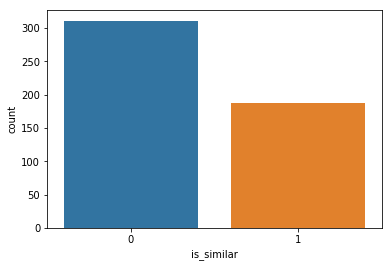

In [0]:
sns.countplot(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_1 = sentence_1_array[:399]
x_test_1 = sentence_1_array[399:]

x_train_2 = sentence_2_array[:399]
x_test_2 = sentence_2_array[399:]

y_train = y[:399].values
y_test = y[399:].values

# get embeding matrix using word2vec

In [0]:
from gensim.models import Word2Vec

In [0]:
import 

In [0]:
embedding_dim = 100

model = Word2Vec(full_sentence_list, size = embedding_dim)


word_vectors = model.wv

In [0]:
word_vectors.vectors

array([[ 0.14205919, -0.16811027,  0.17730115, ...,  0.09888493,
        -0.03199545,  0.20835094],
       [ 0.09909952, -0.11667731,  0.12038192, ...,  0.07667314,
        -0.02410014,  0.1429525 ],
       [ 0.10710692, -0.11990593,  0.13238601, ...,  0.07853694,
        -0.02339884,  0.15308538],
       ...,
       [ 0.02760994, -0.02903088,  0.03187255, ...,  0.01509727,
        -0.00442704,  0.03583075],
       [ 0.01557164, -0.02572109,  0.02365738, ...,  0.0173153 ,
        -0.00508826,  0.02389418],
       [ 0.02960916, -0.04173166,  0.03777507, ...,  0.02066562,
        -0.0110893 ,  0.04294475]], dtype=float32)

In [0]:
word_vectors.vocab

{'&': <gensim.models.keyedvectors.Vocab at 0x7fc94009a470>,
 '1000': <gensim.models.keyedvectors.Vocab at 0x7fc94009a828>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7fc94009aba8>,
 '4': <gensim.models.keyedvectors.Vocab at 0x7fc94009a320>,
 '500': <gensim.models.keyedvectors.Vocab at 0x7fc94009a7f0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fc953e5d828>,
 'about': <gensim.models.keyedvectors.Vocab at 0x7fc953e3f3c8>,
 'access': <gensim.models.keyedvectors.Vocab at 0x7fc94009a160>,
 'account?': <gensim.models.keyedvectors.Vocab at 0x7fc94009a4e0>,
 'affect': <gensim.models.keyedvectors.Vocab at 0x7fc94009a9b0>,
 'after': <gensim.models.keyedvectors.Vocab at 0x7fc9400961d0>,
 'against': <gensim.models.keyedvectors.Vocab at 0x7fc94009a048>,
 'all': <gensim.models.keyedvectors.Vocab at 0x7fc9400968d0>,
 'always': <gensim.models.keyedvectors.Vocab at 0x7fc940096320>,
 'am': <gensim.models.keyedvectors.Vocab at 0x7fc953e5d080>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7fc940079a

In [0]:
len(tokenizer.word_index)

3051

In [0]:
from keras import backend as K

In [0]:
# define model
emb_layer = layers.Embedding(len(tokenizer.word_index)+1, 100)


sentence_one_input = layers.Input(shape = (100, ))
sentence_two_input = layers.Input(shape = (100, ))


sentence_one_emb = emb_layer(sentence_one_input)
sentence_one_emb = layers.SpatialDropout1D(0.3)(sentence_one_emb)
sentence_one_blstm = layers.Bidirectional(layers.LSTM(256))(sentence_one_emb)


sentence_two_emb = emb_layer(sentence_two_input)
sentence_two_emb = layers.SpatialDropout1D(0.3)(sentence_two_emb)
sentence_two_blstm = layers.Bidirectional(layers.LSTM(256))(sentence_two_emb)


concat_layer= layers.concatenate([sentence_one_blstm, sentence_two_blstm])

# for manhattan distance

def exponent_neg_manhattan_distance(x, hidden_size=512):  # by using bidirection lstm : hidden state * 2
    ''' Helper function for the similarity estimate of the LSTMs outputs '''
    return K.exp(-K.sum(K.abs(x[:,:hidden_size] - x[:,hidden_size:]), axis=1, keepdims=True))
  
output = layers.Lambda(exponent_neg_manhattan_distance)(concat_layer)
# output = layers.Dense(512, activation='relu')(output)
# output = layers.Dense(1, activation='sigmoid')(output)

model = models.Model([sentence_one_input, sentence_two_input], output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 100)     305200      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 512)          731136      embedding_2[0][0]          

In [0]:
from keras.utils import plot_model

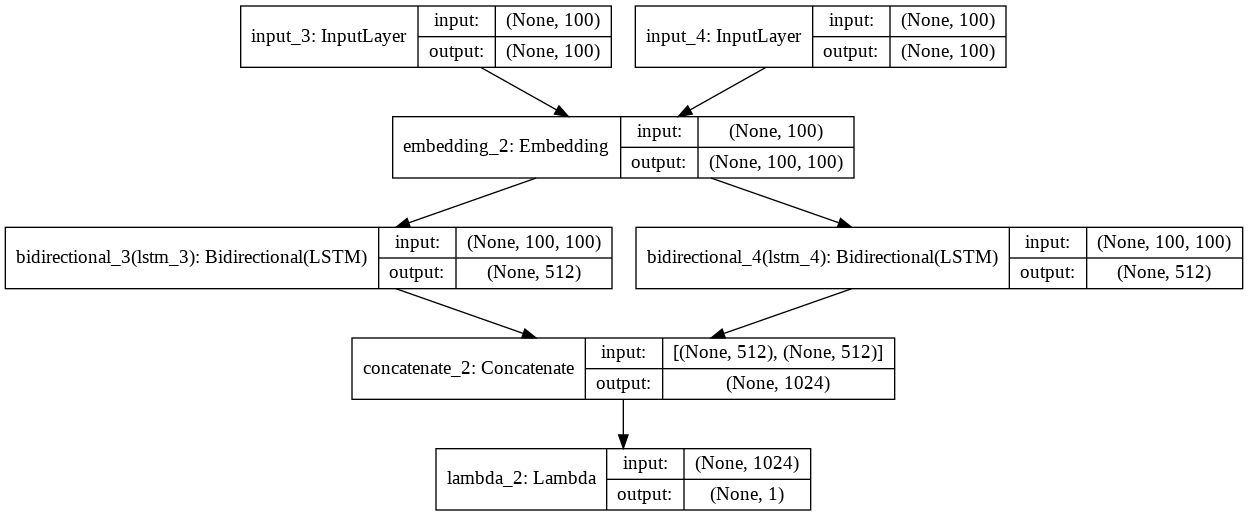

In [0]:
plot_model(model, 'model.png', show_shapes=True)

In [0]:
model.fit([x_train_1, x_train_2], y_train, batch_size=256, epochs=100, validation_data=[[x_test_1, x_test_2], y_test])

Train on 399 samples, validate on 100 samples
Epoch 1/100
399/399 [==============================] - 6s 14ms/step - loss: 1.7768 - acc: 0.6266 - val_loss: 0.8920 - val_acc: 0.6100
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 1.2929 - acc: 0.6266 - val_loss: 0.8527 - val_acc: 0.6100
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 1.1779 - acc: 0.6266 - val_loss: 0.8005 - val_acc: 0.6100
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 1.0800 - acc: 0.6266 - val_loss: 0.7422 - val_acc: 0.6100
Epoch 5/100
399/399 [==============================] - 2s 5ms/step - loss: 0.9740 - acc: 0.6266 - val_loss: 0.6980 - val_acc: 0.6100
Epoch 6/100
399/399 [==============================] - 2s 5ms/step - loss: 0.8886 - acc: 0.6266 - val_loss: 0.6734 - val_acc: 0.6100
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.8199 - acc: 0.6266 - val_loss: 0.6665 - val_acc: 0.6100
Epoch 8/100
399/399 [=